# BAGGING

Bagging improves the performance of several basic algorithms by making it more robust.

We will look at Linear Regression and Decision Tree Regressor model as our base models for Bagging.

We will use a housing price dataset (regression problem) with 13 features and 506 data samples.

## IMPORTING PACKAGES

The important packages have been imported for you.

In [1]:
# IMPORTING IMPORTANT PACKAGES
# RUN THE CELL AS IT IS.
# DO NOT CHANGE THIS CELL!

import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
ans = [0]*7

## RANDOM NUMBER/LIST GENERATOR

We will be using this function to generate a list of random numbers to get consistent results which are important for evaluation. While doing your own projects and work you can use libraries like random and numpy.

A brief description of the function:

_random_generator(seed, low, high, size)_

**seed** = A different seed generates a new list of random number but for the same seed, the same random number is generated.

**low** = Lower limit of the range in which to generate random numbers. (**INCLUSIVE**)

**high** = Upper limit of the range in which to generate random numbers. (**EXCLUSIVE**)

**size** = Number of random numbers to generate. If size = 1, then one scalar number is returned. If size>1 then a list of random numbers is generated.

Similar for _unique_random_generator_. This function returns a list of unique random numbers unline _random_generator_

In [2]:
def random_generator(seed = 0, low = 0, high = None, size = None):
    s = seed
    a = 11
    b = 13

    if high is None:
        return ("Error. Upper Limit not found")
    if size is None:
        return ("Error. Size not found")
    if size == 1:
        return ((a*s+b)%high)
    random_list = []
    for i in range(size):
        random_list.append((a*s+b)%high)
        s = (a*s+b)
    return random_list

## LOADING DATASET
The dataset is of a regression problem.

The target label is housing price. There are 13 features all of which are numerical in nature.


In [3]:
# LOADING THE DATASET
# RUN THE CELL AS IT IS
# DO NOT CHANGE THIH CELL

# reg_dataset -> Regression Dataset : Boston Dataset with Housing price as the target and 13 Features related to the houses.
# There are no categorical variables.

def load_dataset():
    reg_x, reg_y = load_boston(return_X_y = True)
    reg_data = np.concatenate((reg_x, np.array(reg_y).reshape(-1, 1)), axis = 1)
    cols = ["feature"+str(i) for i in range(1, 14)]
    cols = cols + ["price(target)"]
    reg_dataset = pd.DataFrame(data = reg_data, columns = cols)

    return reg_dataset

reg_dataset = load_dataset()
print("REGRESSION DATASET : \n", reg_dataset)

REGRESSION DATASET : 
      feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0     0.00632      18.0      2.31       0.0     0.538     6.575      65.2   
1     0.02731       0.0      7.07       0.0     0.469     6.421      78.9   
2     0.02729       0.0      7.07       0.0     0.469     7.185      61.1   
3     0.03237       0.0      2.18       0.0     0.458     6.998      45.8   
4     0.06905       0.0      2.18       0.0     0.458     7.147      54.2   
..        ...       ...       ...       ...       ...       ...       ...   
501   0.06263       0.0     11.93       0.0     0.573     6.593      69.1   
502   0.04527       0.0     11.93       0.0     0.573     6.120      76.7   
503   0.06076       0.0     11.93       0.0     0.573     6.976      91.0   
504   0.10959       0.0     11.93       0.0     0.573     6.794      89.3   
505   0.04741       0.0     11.93       0.0     0.573     6.030      80.8   

     feature8  feature9  feature10  feature11  featu

## SPLITTING INTO TRAIN AND TEST SET

We will divide the dataset into train and test set in the ratio 8:2.
Sklearn's built-in function "train_test_split" is supposed to be used.

eg:- train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = k, random_state = integer)  where k is a floating point number between 0 and 1. The number signifies the fraction of dataset to be given to the test dataset.

**NOTE**: Use random_state = 40 for evaluation purposes

Confirm that your training and test set are correctly alloted by checking with the number of samples in each.

In [12]:
# DIVIDE THE DATASET INTO TRAINING AND TEST SET
# Use "train_test_split" from sklearn to split the dataset into 8:2 ratio.
# TRAINING SET SIZE : TEST SET SIZE = 8 : 2
# NOTE: USE "random_state = 40" WHILE SPLITTING. OTHERWISE EVALUATION MIGHT BE WRONG

# START YOUR CODE HERE
X = reg_dataset.iloc[:,0:-1]
y = reg_dataset.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
# END YOUR CODE HERE

## QUESTIONS:
The first part of the assignment focuses on Linear Regression Models and the second part focuses on Decision Tree models.

Places where you need to write your code have been indicated. Some parameters have been fixed for evaluation purposes. Be careful not to change them.

#### **BAGGING WITH LINEAR REGRESSION MODELS**

### **QUESTION 1**: Fit a Linear Regression model on  randomly sampled (with replacement) training data and assign the mean squared error of the predictions on the test set to ans[0]. (1 mark).
**NOTE**: You can use the mean squared error from sklearn which has been imported above for you.

**NOTE**: While randomly sampling we need to select 404 training samples but not all of them need to be unique.

**HINT**: mse = mean_squared_error(y_true, y_pred) where the mean squared error gets stored in the variable mse.

**HINT**: df.iloc[[0, 2, 0, 4], 1] selects the 1st, 3rd, 1st and 5th data sample(row) from the df DataFrame.

In [25]:
# SOME PART OF THE CODE HAS BEEN WRITTEN FOR YOU. DO NOT CHANGE THEM OTHERWISE IT MIGHT BE WRONGLY EVALUATED.
# THE DATA SAMPLES HAVE BEEN SELECTED FOR YOU FOR EVALUATION PURPOSES.


linreg1 = LinearRegression()                 # 1st Linear Regression Model for you to use
row_index = random_generator(1, 0, 404, 404) # Row indexes that you need to fit your model on. Do not change it.

# Try to print row_index to understand what "randomly sampled with replacement means"

# START YOUR CODE HERE:

tempx_train1 = X_train.iloc[row_index]
tempy_train1 = y_train.iloc[row_index]
linreg1.fit(tempx_train1, tempy_train1)
y_test_pred1 = linreg1.predict(X_test)

# END YOUR CODE HERE

In [26]:
# SUBSTITUTE YOUR ANSWER IN PLACE OF None

ans[0] = mean_squared_error(y_test, y_test_pred1)   

### **QUESTION 2**: Fit a second linear Regression model on new randomly sampled (with replacement) training data and assign the mean squared error of the average of the predictions of the two linear regression models on the test set to ans[1]. (1 mark)
eg:- If for a particular data point, model1 predicts 20.0 and model2 predicts 30.0 then the final prediction should be 25.0.

**WARNING**: The question asks for the mean squared error of the predictions and not the predictions themselves.

In [29]:
# SOME PART OF THE CODE HAS BEEN WRITTEN FOR YOU. DO NOT CHANGE WHERE NOT INDICATED.
# THE DATA SAMPLES HAVE BEEN SELECTED FOR YOU

linreg2 = LinearRegression()                   # 2nd Linear Regression Model
row_index = random_generator(3, 0, 404, 404)   # Row indexes that you need to fit your model on. Do not change it.

# Use the previous linear regression model (linreg1) as your first model. You have already trained your linreg1 so 
# you do not need to do that again. The final predictions would be the average of the predictions of these two models.

# START YOUR CODE HERE:

tempx_train2 = X_train.iloc[row_index]
tempy_train2 = y_train.iloc[row_index]
linreg2.fit(tempx_train2, tempy_train2)
y_test_pred2 = linreg2.predict(X_test)

y_pred_avg2 = []
for i in range(len(y_test_pred1)):
    y_pred_avg2.append((y_test_pred1[i] + y_test_pred2[i])/2)

# END YOUR CODE HERE

In [30]:
# SUBSTITUTE YOUR ANSWER IN PLACE OF None

ans[1] = mean_squared_error(y_test, y_pred_avg2)

Did the combined predictions have a lower mean squared error compared to the individual mean squared errors of the two models?

### **QUESTION 3**: Fit a third linear Regression model on  new randomly sampled (with replacement) training data and assign the mean squared error of the average of the predictions  of the three linear regression models on the test set to ans[2].    (2 marks)
eg:- If for a particular data point, model1 predicts 20.0, model2 predicts 30.0 and model3 predicts 70.0 then the final prediction should be (20.0+30.0+70.0)/3 = 60.0.

**WARNING**: The question asks for the mean squared error of the predictions and not the predictions themselves.

In [31]:
# SOME PART OF THE CODE HAS BEEN WRITTEN FOR YOU. DO NOT CHANGE WHERE NOT INDICATED.
# THE DATA SAMPLES HAVE BEEN SELECTED FOR YOU

linreg3 = LinearRegression()                  # 3rd Linear Regression Model
row_index = random_generator(5, 0, 404, 404)      # Row indexes that you need to fit your model on. Do not change it.

# linreg1, linreg2 and linreg3 would be your 3 models. You have already fitted linreg1 and linreg2 so you do not need to 
# train them again.

# START YOUR CODE HERE:. 

tempx_train3 = X_train.iloc[row_index]
tempy_train3 = y_train.iloc[row_index]
linreg3.fit(tempx_train3, tempy_train3)
y_test_pred3 = linreg3.predict(X_test)

y_pred_avg3 = []
for i in range(len(y_test_pred1)):
    y_pred_avg3.append((y_test_pred1[i] + y_test_pred2[i] + y_test_pred3[i])/3)

# END YOUR CODE HERE

In [32]:
# SUBSTITUTE YOUR ANSWER IN PLACE OF None

ans[2] = mean_squared_error(y_test, y_pred_avg3)     

Did the mean squared error of the averaged predictions (ensembled predictions) reduced further? Is it less than the individual mean squared errors of the models?

### **QUESTION 4**: Fit a fourth linear Regression model on new randomly sampled training data and assign the mean squared error of the average of the predictions of the four linear regression models on the test set to ans[3]. (1 mark)
**WARNING**; The question asks for the mean squared error of the predictions and not the predictions themselves.

In [33]:
# SOME PART OF THE CODE HAS BEEN WRITTEN FOR YOU. DO NOT CHANGE WHERE NOT INDICATED.
# THE DATA SAMPLES HAVE BEEN SELECTED FOR YOU

linreg4 = LinearRegression()                  # 3rd Linear Regression Model
row_index = random_generator(7, 0, 404, 404)    # Row indexes that you need to fit your model on. Do not change it.

# Use the previous 3 models(linreg1, linreg2, linreg3) and do not train them again.

# START YOUR CODE HERE:. 

tempx_train4 = X_train.iloc[row_index]
tempy_train4 = y_train.iloc[row_index]
linreg4.fit(tempx_train4, tempy_train4)
y_test_pred4 = linreg4.predict(X_test)

y_pred_avg4 = []
for i in range(len(y_test_pred1)):
    y_pred_avg4.append((y_test_pred1[i] + y_test_pred2[i] + y_test_pred3[i] + y_test_pred4[i])/4)

# END YOUR CODE HERE

In [34]:
# SUBSTITUTE YOUR ANSWER IN PLACE OF None

ans[3] = mean_squared_error(y_test, y_pred_avg4)

Did the mean squared error reduce this time as well? If not, then why?

So the final error depends also on how good the individual models are. Let's look at how a large number of models perform together.

### **QUESTION 5**: Fit 50 linear Regression models on randomly sampled training data (new random sampling for each model) and assign the mean squared error of the average of the predictions of the 50 linear regression models on the test set to ans[4]. (2 marks)
eg:- If model1 predicts y1, model2 predicts y2 and so on till y50, then final prediction would be (y1+y2+...+y50)/50.

**WARNING**; The question asks for the mean squared error of the predictions and not the predictions themselves.

In [46]:
# SOME PART OF THE CODE HAS BEEN WRITTEN FOR YOU. DO NOT CHANGE WHERE NOT INDICATED.
# FEEL FREE TO USE MORE CELLS FOR YOUR CODE.
# THE DATA SAMPLES HAVE BEEN SELECTED FOR YOU
# HINT: You can add the predictions in a for loop.

n = 50                                           # 50 Linear Regression models 
train_preds = 0
test_preds = [0 for i in range(len(y_test))]
test_mse = []

np.random.seed(10)                               # Used for consistent answers for evaluation purposes
subset_seed = random_generator(10, 0, 200, n)
for i in range(n):
    np.random.seed(subset_seed[i])                            # Used for consistent answers for evaluation purposes
    row_index = random_generator(subset_seed[i], 0, 404, 404) # Row indexes that you need to fit your model on. Do not change it.
    
  # START YOUR CODE HERE:
    linreg = LinearRegression()
    tempx_train = X_train.iloc[row_index]
    tempy_train = y_train.iloc[row_index]
    linreg.fit(tempx_train, tempy_train)
    y_test_pred = linreg.predict(X_test)   
    
    for j in range(len(test_preds)):
        test_preds[j] += y_test_pred[j]
        
    ith_preds = [k/(i+1) for k in test_preds]
    test_mse.append(mean_squared_error(y_test, ith_preds))
    
test_preds = [k/n for k in test_preds]

  # END YOUR CODE HERE

In [47]:
# SUBSTITUTE YOUR ANSWER IN PLACE OF None

ans[4] = mean_squared_error(y_test, test_preds)

Is it lower than the previous mean squared errors? 
If yes, does it go down till 0? To check that try plotting the test mean squared error vs no of linear regression models used.

Some of the matplotlib code has been written for you.

#### PLOTTING TEST MSE VS NUM OF MODELS USED

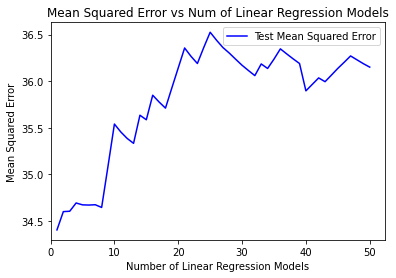

In [48]:
# num_models : list of the number of models
# test_mse : list of the corresponding test mean squared error

num_models = [i+1 for i in range(n)]        # remember to replace it with your number of models used
test_mse = test_mse        # remember to replace it with your test mean square errors

plt.plot(num_models, test_mse, c = "b", label = "Test Mean Squared Error")
plt.xlabel("Number of Linear Regression Models")
plt.legend()
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error vs Num of Linear Regression Models")
plt.gca().set_xlim(left = 0)
plt.show()

Can you justify why bagging helps?
If there is slight dip in the test mse curve (i.e it does not saturate at its lowest point) can you explain why is it?

**HINT**: You can also try plotting the mean sqaured error of the predictions on the _WHOLE_ training set to gather more insight.

#### **BAGGING WITH DECISION TREE MODELS**

### **QUESTION 6**: Fit a single DecisionTree Regression model on randomly sampled(with replacement) training data and assign the mean squared error of the predictions on the test set to ans[5]. (1 mark)

In [49]:
# SOME PART OF THE CODE HAS BEEN WRITTEN FOR YOU. DO NOT MAKE CHANGES WHERE NOT INDICATED.
# THE DATA SAMPLES HAVE BEEN SELECTED FOR YOU.

dt1 = DecisionTreeRegressor(max_depth = 3, random_state = 10)    # Decision tree that you have to use. Don't change parameters.
row_index = random_generator(8, 0, 404, 404)                     # Row indexes that you need to fit your model on. Do not change it.
 
# START YOUR CODE HERE:. 

tempx_train1 = X_train.iloc[row_index]
tempy_train1 = y_train.iloc[row_index]
dt1.fit(tempx_train1, tempy_train1)
y_test_pred1 = dt1.predict(X_test)

# END YOUR CODE HERE

In [50]:
# SUBSTITUTE YOUR ANSWER IN PLACE OF None

ans[5] = mean_squared_error(y_test, y_test_pred1)

### **QUESTION 7**: Train and fit 50 Decision Trees on randomly sampled training data (new random sampling for each decision tree) and assign the mean squared error of the average of all predictions on the test set to ans[6]. (2 marks)
eg:- If model1 predicts y1, model2 predicts y2 and so on till y50, then final prediction would be (y1+y2+...+y50)/50.

**WARNING**: The question asks for the mean squared error and not the final prediction.

In [51]:
# SOME PART OF THE CODE HAS BEEN WRITTEN FOR YOU. DO NOT MAKE CHANGES WHERE NOT INDICATED.
# THE DATA SAMPLE HAS BEEN SELECTED FOR YOU.

n = 50
train_preds = 0
test_preds = [0 for i in range(len(y_test))]
test_mse = []

np.random.seed(11)                                                  # Used for consistent answers for evaluation purposes.
subset_seed = random_generator(9, 0, 200, n)
for i in range(n):
    row_index = random_generator(subset_seed[i], 0, 404, 404)                     # Row indexes that you need to fit your model on. Do not change it.
    dt = DecisionTreeRegressor(max_depth = 3, random_state = 10)      # Decision Tree that you need to use.Don't change parameters.

  # START YOUR CODE HERE:
    tempx_train = X_train.iloc[row_index]
    tempy_train = y_train.iloc[row_index]
    dt.fit(tempx_train, tempy_train)
    y_test_pred = dt.predict(X_test)   
    
    for j in range(len(test_preds)):
        test_preds[j] += y_test_pred[j]
    
    ith_preds = [k/(i+1) for k in test_preds]
    test_mse.append(mean_squared_error(y_test, ith_preds))

test_preds = [k/n for k in test_preds]

  # END YOUR CODE HERE

In [52]:
# SUBSTITUTE YOUR ANSWER IN PLACE OF None

ans[6] = mean_squared_error(y_test, test_preds)

Try to plot the test mean squared error vs the num of decision trees used for that prediction. The graph should be similar to the Linear Regression graph. 

You can also try to plot the mean squared error of the predictions on the _WHOLE_ training dataset to gain more insight.

Some of the matplotlib code has been written for you.

#### PLOTTING THE TEST MSE VS NUM OF DECISION TREES

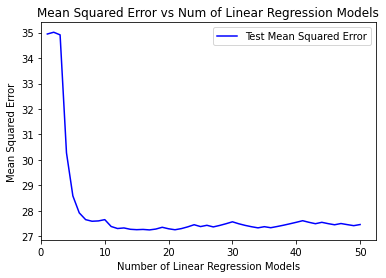

In [53]:
# num_trees : list of the number of trees
# test_mse : list of the corresponding test mean squared error

num_trees = [i+1 for i in range(n)]      # remember to replace it with your implemented code
test_mse = test_mse          # remember to replace it with your implemented code

plt.plot(num_trees, test_mse, c = "b", label = "Test Mean Squared Error")
plt.xlabel("Number of Linear Regression Models")
plt.legend()
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error vs Num of Linear Regression Models")
plt.gca().set_xlim(left = 0)
plt.show()

Did the Decision Tree Perform better or the Linear Regression Model?

Was there a dip in the test mean squared error in the Decision Trees?

Keep the test mean square error in mind for the next assignment where we will tweak the decision tree model a bit to arrive at a very popular model called Random Forest model.

In [54]:
import json
ans = [str(item) for item in ans]

filename = "group44_Rushali_Chakraborty_Bagging"

# Eg if your name is Saurav Joshi and group id is 0, filename becomes
# filename = group0_Saurav_Joshi_Bagging

## Do not change anything below!!
- Make sure you have changed the above variable "filename" with the correct value. Do not change anything below!!

In [55]:
from importlib import import_module
import os
from pprint import pprint

findScore = import_module('findScore')
response = findScore.main(ans)
response['details'] = filename
with open(f'evaluation_{filename}.json', 'w') as outfile:
    json.dump(response, outfile)
pprint(response)

{'Comments': 'Please make sure the Python script you are submitting is not '
             'having errors. Try running before submitting',
 'Message': 'Successfully submitted! Thanks for taking the exercise',
 'details': 'group44_Rushali_Chakraborty_Bagging',
 'status': 'Success'}
